# Step 1: Introduction to Pandas

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
df = pd.read_csv("dataset2.csv")
df.set_index("time",inplace=True)
time = df.index
df.head()

,A60,B60,A80,B80,A100,B100,A120,B120,A140,B140,A160,B160,A180,B180,A200,B200
time,,,,,,,,,,,,,,,,
0,0.601380,0.005124,0.780783,-0.001100,0.977195,-0.023776,1.172569,-0.027472,1.394396,-0.013861,1.583984,-0.014036,1.794815,-0.009707,2.009021,-0.012475
1,0.572597,-0.007165,0.759028,0.002869,0.967283,0.001777,1.162058,0.001211,1.359970,0.026139,1.541462,0.017329,1.724535,0.011785,1.923131,0.014841
2,0.574852,-0.015266,0.773124,0.015961,0.936298,0.022882,1.136366,0.019062,1.311560,0.036195,1.501134,0.036814,1.670674,0.047780,1.854458,0.056459
3,0.574444,0.004979,0.739659,0.014633,0.937232,0.035337,1.099784,0.034862,1.293144,0.055013,1.442834,0.049478,1.610323,0.067388,1.770753,0.085973
4,0.545312,0.011487,0.746717,0.022330,0.900225,0.019714,1.084564,0.052922,1.262887,0.049275,1.395854,0.081266,1.560455,0.105065,1.713550,0.131842


# Step 2: A First Look

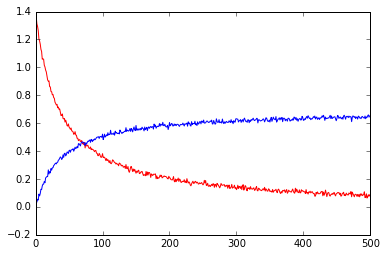

In [4]:
plt.plot(time, df.A140, "r")
plt.plot(time, df["B140"], "b")
plt.show()

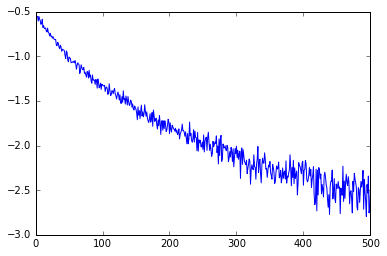

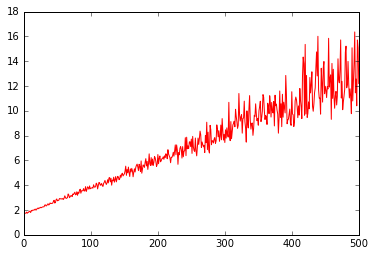

In [5]:
plt.plot(time, np.log(df.A60), "b")
plt.show()
plt.plot(time, 1.0/df.A60, "r")
plt.show()

# Step 3: Initial Rates Analysis

60, rate = 0.0029, corr. coeff. = -0.9415


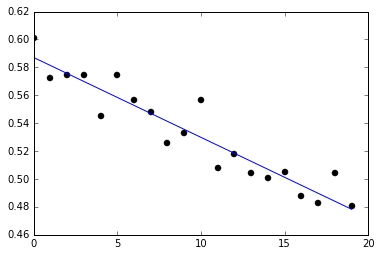

80, rate = 0.0045, corr. coeff. = -0.9765


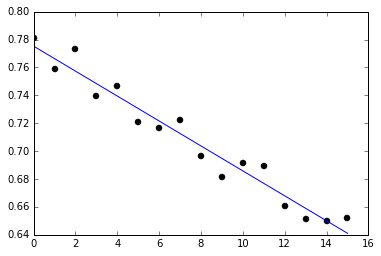

100, rate = 0.0081, corr. coeff. = -0.9935


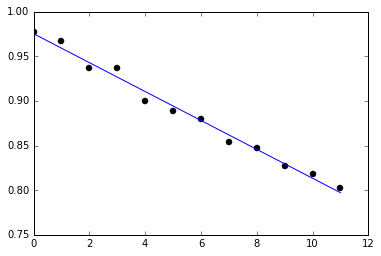

120, rate = 0.0108, corr. coeff. = -0.9909


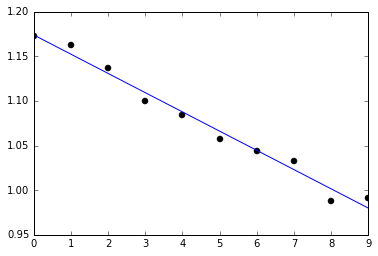

140, rate = 0.0164, corr. coeff. = -0.9945


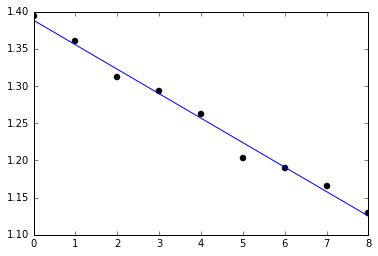

160, rate = 0.0214, corr. coeff. = -0.9972


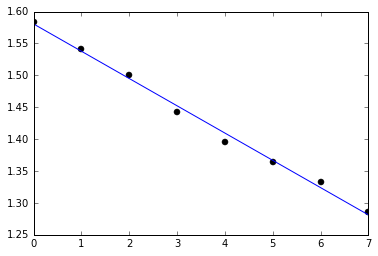

180, rate = 0.0271, corr. coeff. = -0.9972


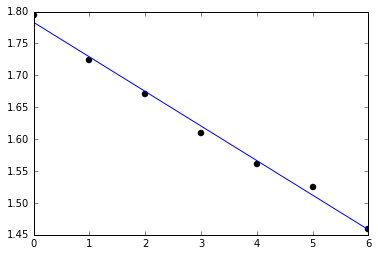

200, rate = 0.0358, corr. coeff. = -0.9979


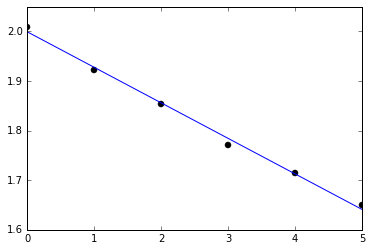

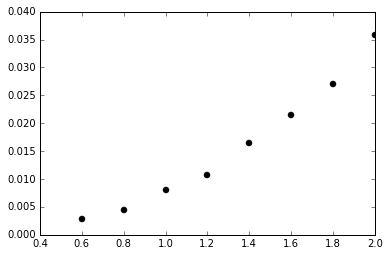

In [6]:
max_conversion = 0.20

initial_concentrations=[]
initial_rates=[]
def initial_rate(index):
    x = []
    y = []
    initial_concentration = index / 100.0
    initial_concentrations.append(initial_concentration)
    min_concentration = initial_concentration * (1.0 - max_conversion)
    for t, c in zip(time, df["A%d" % index]):
        if c < min_concentration:
            break
        x.append(t)
        y.append(c)
    x = np.array(x)
    y = np.array(y)
    
    m, b, r, p, err = linregress(x,y)
    rate = -m/2.0
    initial_rates.append(rate)
    fitted_y = m*x + b
    print "%d, rate = %.4f, corr. coeff. = %.4f" % (index, rate, r)
    
    plt.plot(x, y, "ko")
    plt.plot(x, fitted_y, "b")
    plt.show()
    
for i in np.arange(60.0,220.0,20.0):
    initial_rate(i)

initial_concentrations = np.array(initial_concentrations)
initial_rates = np.array(initial_rates)
plt.plot(initial_concentrations, initial_rates, "ko")

# Step 4: Getting the Rate Constant

k = 0.0085


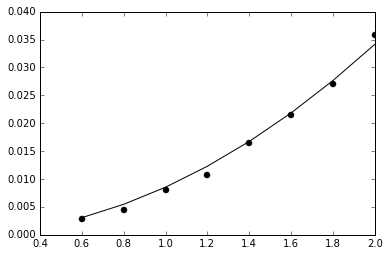

In [7]:
def second_order(A,k):
    return k*A*A

popt,pcov = curve_fit(second_order, initial_concentrations, initial_rates)
print "k = %.4f" % popt[0]
fitted_rate = second_order(initial_concentrations, popt[0])
plt.plot(initial_concentrations, initial_rates, "ko")
plt.plot(initial_concentrations, fitted_rate, "k")
plt.show()

# Step 5: Rate vs. Concentration

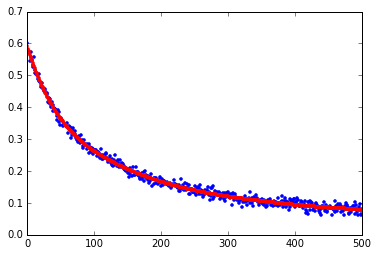

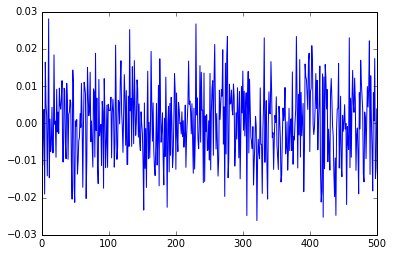

0.0100648461229


In [10]:
polynomial_order = 7
measured_concentration = df.A60
poly_coeff = np.polyfit(time, measured_concentration, polynomial_order)
polynomial = np.poly1d(poly_coeff)
fitted_concentration = polynomial(time)
plt.plot(time, measured_concentration, "b.")
plt.plot(time, fitted_concentration, "r.")
plt.show()
residual = measured_concentration - fitted_concentration
plt.plot(time,residual)
plt.show()
RMSE = np.sqrt(np.mean(np.square(residual)))
print RMSE

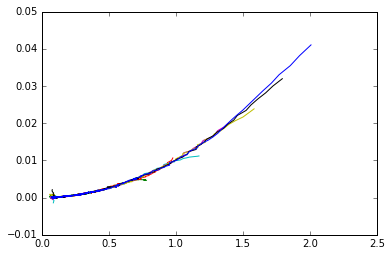

In [12]:
polynomial_order = 15

def estimate_rate(index):
    concentration = df["A%d" % index]
    poly_coeff = np.polyfit(time, concentration, polynomial_order)
    polynomial = np.poly1d(poly_coeff)
    fitted_concentration = polynomial(time)
    derivative = np.polyder(polynomial)
    rate_vector = -0.5*derivative(time)
    df["rate%d" % index]=Series(rate_vector, index=time)
    plt.plot(concentration, rate_vector)

for i in range(60,220,20):
    estimate_rate(i)
plt.show()

# Step 6: Getting the Rate Constant in Aggregate

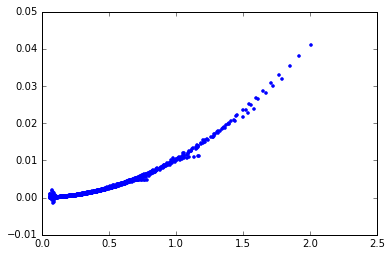

In [13]:
x = []
y = []

for index in range(60,220,20):
    this_A = df["A%d" % index]
    this_rate = df["rate%d" % index]
    x.extend(this_A)
    y.extend(this_rate)
    
x = np.array(x)
y = np.array(y)
plt.plot(x,y,"b.")

k = 0.0102


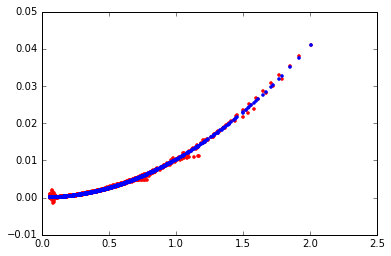

In [15]:
popt,pcov = curve_fit(second_order, x, y)
print "k = %.4f" % popt[0]
fitted = second_order(x, popt[0])
plt.plot(x, y, "r.")
plt.plot(x, fitted, "b.")
plt.show()

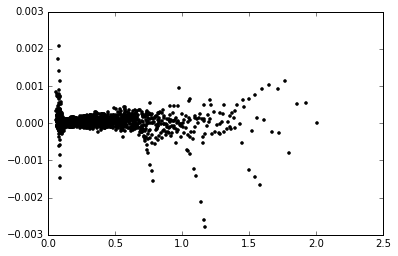

In [16]:
residual = y - fitted
plt.plot(x, residual, "k.")
plt.show()